In [ ]:
pip install -r "requirements.txt"

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words("english"))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
from PIL import Image

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv("file1.csv")

In [3]:
df.head()

,Unnamed: 0,date,user,tweet
0,0,2023-04-01 07:27:44+00:00,MohsinK94517919,To check how many sim registered on your Cnic ...
1,1,2023-04-01 07:27:34+00:00,JaniceSharon9,Make money online using your phone at the comf...
2,2,2023-04-01 07:27:33+00:00,AnaghbratiR,Next Schedule join telegram ⬇️⬇️⬇️⬇️\nhttps://...
3,3,2023-04-01 07:27:09+00:00,Myworld556,Your nic #เอ๋ชนม์สวัสดิ์ #AprilFoolsDay #Austr...
4,4,2023-04-01 07:27:00+00:00,AbdulRa76608989,https://t.co/AaV96837gk\n\nسرگودھا سے لاہور صر...


In [4]:
df.isnull().sum()

Unnamed: 0    0
date          0
user          0
tweet         0
dtype: int64

In [5]:
df.shape

(5000, 4)

In [6]:
df1 = df[["tweet"]]

In [7]:
df1.head()

,tweet
0,To check how many sim registered on your Cnic ...
1,Make money online using your phone at the comf...
2,Next Schedule join telegram ⬇️⬇️⬇️⬇️\nhttps://...
3,Your nic #เอ๋ชนม์สวัสดิ์ #AprilFoolsDay #Austr...
4,https://t.co/AaV96837gk\n\nسرگودھا سے لاہور صر...


In [8]:
print(df1["tweet"].iloc[0], "\n")
print(df1["tweet"].iloc[1], "\n")
print(df1["tweet"].iloc[2], "\n")
print(df1["tweet"].iloc[3], "\n")
print(df1["tweet"].iloc[4], "\n")

To check how many sim registered on your Cnic Just send your cnic  on 668
#เอ๋ชนม์สวัสดิ์ #AprilFoolsDay #AustralianGP #RussiaIsCollapsing #IPL2023OpeningCeremony #JioCinema #tnwx #cskvsgt https://t.co/1mXMdniygJ 

Make money online using your phone at the comfort of your home with Eagleweb e-commerce.
#AprilFoolsDay
#RussiaIsCollapsing
#IPL2023OpeningCeremony
#JioCinema https://t.co/rFKJYIduHQ 

Next Schedule join telegram ⬇️⬇️⬇️⬇️
https://t.co/KuX7ciWQF4

#PBKSvKKR #DCvsLSG #TATAIPL #TATAIPL2023 #IPL2023 #IPL2023OpeningCeremony #IPLonJioCinema #iplopeningceremony #Dream11 #CricketTwitter #FantasyCricket #fantasypl #FantasyFootball #JioCinema #Cricket_News https://t.co/erIOVUENi3 

Your nic #เอ๋ชนม์สวัสดิ์ #AprilFoolsDay #AustralianGP #RussiaIsCollapsing #IPL2023OpeningCeremony #JioCinema 

https://t.co/AaV96837gk

سرگودھا سے لاہور صرف 9 منٹ میں 😮
#AryanKhan 
#SalmanKhan 
#Zendaya 
#Salmantaseer 
#TATAIPL 
#AprilFoolsDay 
#AustralianGP 
#RussiaIsCollapsing #IPL2023OpeningCeremony #Jio

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tweet   5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB


In [32]:
def dataProcessing(tweet):
    tweet = tweet.lower()
    tweet = re.sub(r"https\S+|www\S+https\S+", "", tweet, flags = re.MULTILINE)
    tweet = re.sub(r"\@w+|\#", "", tweet)
    tweet = re.sub(r"[^\w\s]", "", tweet)
    tweet = re.sub(r"jiocinema", "", tweet)
    tweet = re.sub(r"ipl2023", "", tweet)
    
    text_tokens = word_tokenize(tweet)
    filtered_text = [w for w in text_tokens if not w in stop_words]
    
    return " ".join(filtered_text)

In [33]:
df1.tweet = df1["tweet"].apply(dataProcessing)

In [34]:
df1 = df1.drop_duplicates("tweet")

In [35]:
df1.head()

,tweet,polarity,sentiments
0,check many sim registered cnic send cnic 668 เ...,0.5,Positive
1,make money online using phone comfort home eag...,0.0,Neutral
2,next schedule join telegram pbksvkkr dcvslsg t...,0.0,Neutral
3,nic เอชนมสวสด aprilfoolsday australiangp russi...,0.0,Neutral
4,سرگودھا سے لاہور صرف 9 منٹ میں aryankhan salma...,0.0,Neutral


In [36]:
stemmer = PorterStemmer()

def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [37]:
df1["tweet"] = df1["tweet"].apply(lambda x: stemming(x))

In [38]:
df1.head()

,tweet,polarity,sentiments
0,check many sim registered cnic send cnic 668 เ...,0.5,Positive
1,make money online using phone comfort home eag...,0.0,Neutral
2,next schedule join telegram pbksvkkr dcvslsg t...,0.0,Neutral
3,nic เอชนมสวสด aprilfoolsday australiangp russi...,0.0,Neutral
4,سرگودھا سے لاہور صرف 9 منٹ میں aryankhan salma...,0.0,Neutral


In [39]:
print(df1["tweet"].iloc[0], "\n")
print(df1["tweet"].iloc[1], "\n")
print(df1["tweet"].iloc[2], "\n")
print(df1["tweet"].iloc[3], "\n")
print(df1["tweet"].iloc[4], "\n")

check many sim registered cnic send cnic 668 เอชนมสวสด aprilfoolsday australiangp russiaiscollapsing openingceremony tnwx cskvsgt 

make money online using phone comfort home eagleweb ecommerce aprilfoolsday russiaiscollapsing openingceremony 

next schedule join telegram pbksvkkr dcvslsg tataipl tata openingceremony iplon iplopeningceremony dream11 crickettwitter fantasycricket fantasypl fantasyfootball cricket_news 

nic เอชนมสวสด aprilfoolsday australiangp russiaiscollapsing openingceremony 

سرگودھا سے لاہور صرف 9 منٹ میں aryankhan salmankhan zendaya salmantaseer tataipl aprilfoolsday australiangp russiaiscollapsing openingceremony thankyoupikamee cskvsgt 



In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4794 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet       4794 non-null   object 
 1   polarity    4794 non-null   float64
 2   sentiments  4794 non-null   object 
dtypes: float64(1), object(2)
memory usage: 149.8+ KB


In [41]:
def polarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [42]:
df1["polarity"] = df1['tweet'].apply(polarity)

In [43]:
df1.head()

,tweet,polarity,sentiments
0,check many sim registered cnic send cnic 668 เ...,0.5,Positive
1,make money online using phone comfort home eag...,0.0,Neutral
2,next schedule join telegram pbksvkkr dcvslsg t...,0.0,Neutral
3,nic เอชนมสวสด aprilfoolsday australiangp russi...,0.0,Neutral
4,سرگودھا سے لاہور صرف 9 منٹ میں aryankhan salma...,0.0,Neutral


In [44]:
def sentiment(label):
    
    if label < 0:
        return "Negative"
    
    elif label == 0:
        return "Neutral"
    
    elif label > 0:
        return "Positive"

In [45]:
df1["sentiments"] = df1['polarity'].apply(sentiment)

In [46]:
df1.head()

,tweet,polarity,sentiments
0,check many sim registered cnic send cnic 668 เ...,0.5,Positive
1,make money online using phone comfort home eag...,0.0,Neutral
2,next schedule join telegram pbksvkkr dcvslsg t...,0.0,Neutral
3,nic เอชนมสวสด aprilfoolsday australiangp russi...,0.0,Neutral
4,سرگودھا سے لاہور صرف 9 منٹ میں aryankhan salma...,0.0,Neutral


Text(0.5, 1.0, 'Sentiments Distribution as Bar Chart')

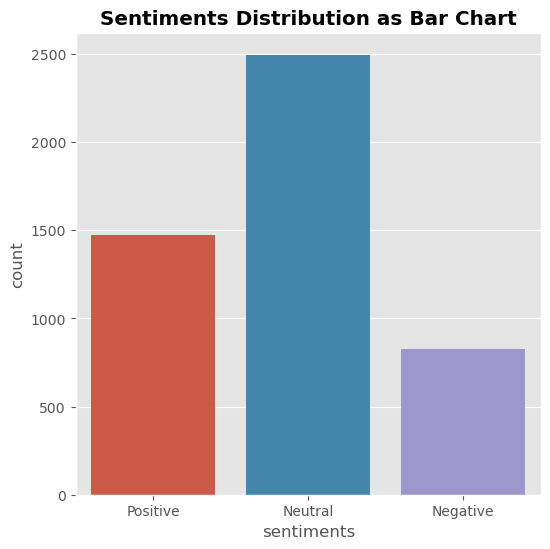

In [47]:
fig = plt.figure(figsize=(6,6))
sns.countplot(x="sentiments", data = df1)

plt.title("Sentiments Distribution as Bar Chart", fontdict={"fontweight": 'bold'})

Text(0.5, 1.0, 'Sentiments Distribution as Pie Chart')

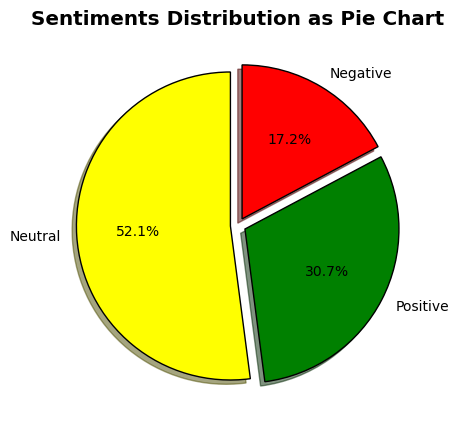

In [48]:
fig = plt.figure(figsize=(5,5))
color = ("yellow", "green", "red")

wp = {'linewidth':1, 'edgecolor': "black"}

tags = df1['sentiments'].value_counts()

explode = (0.05, 0.05, 0.05)

tags.plot(kind= "pie", autopct = "%1.1f%%", shadow = True, colors = color,
         startangle = 90, wedgeprops = wp, explode = explode, label = "")

plt.title("Sentiments Distribution as Pie Chart", fontdict={"fontweight": 'bold'})

In [49]:
mask = np.array(Image.open("Tweet.png"))

In [50]:
pos_tweets = df1[df1.sentiments == "Positive"]
pos_tweets = pos_tweets.sort_values(["polarity"], ascending = False)
pos_tweets.head()

,tweet,polarity,sentiments
1467,best commentary ever seen life ई तरक स खल हई त...,1.0,Positive
1538,robin sir डल क रहल आर अ डल दल छपर bhojpuri com...,1.0,Positive
583,perfect example distriction traphouse,1.0,Positive
545,best app,1.0,Positive
534,bhojpuri commentary best addition ipl 2023 ipl...,1.0,Positive


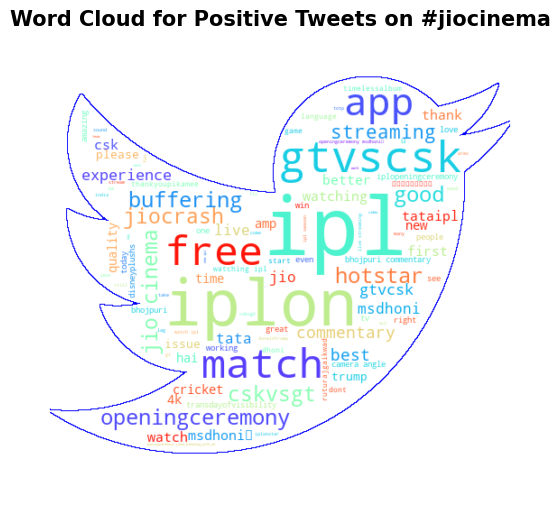

In [51]:
words = " ".join([word for word in pos_tweets['tweet']])
plt.figure(figsize=(6,6), facecolor = "None")

wordcloud = WordCloud(max_words = 100, colormap='rainbow', mask=mask,
                      background_color = "white", 
                      contour_width = 1, contour_color = "blue").generate(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Tweets on #jiocinema", fontsize = 15, fontdict={"fontweight": 'bold'})
plt.show()

In [52]:
neg_tweets = df1[df1.sentiments == "Negative"]
neg_tweets = neg_tweets.sort_values(["polarity"], ascending = False)
neg_tweets.head()

,tweet,polarity,sentiments
2069,worst experience hotstar far better angled vie...,-0.002500,Negative
4629,reliancejio jio cinema sucks dont want free ip...,-0.003571,Negative
2786,jio cinema sucks every 2 mins something right ...,-0.007143,Negative
4967,main feed working even speed 200mbs shit absol...,-0.008333,Negative
2120,lp_vocal bhogleharsha tataipl english commenta...,-0.010606,Negative


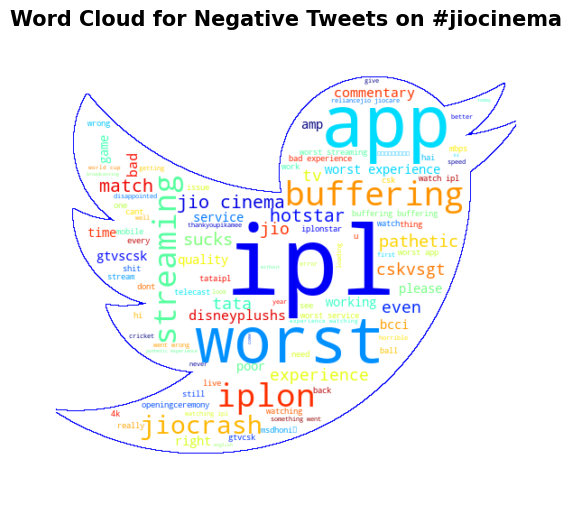

In [53]:
words = " ".join([word for word in neg_tweets['tweet']])
plt.figure(figsize=(6,6), facecolor = "None")

wordcloud = WordCloud(max_words = 100, colormap='jet', mask=mask,
                      background_color = "white", 
                      contour_width = 1, contour_color = "blue").generate(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Negative Tweets on #jiocinema", fontsize = 15, fontdict={"fontweight": 'bold'})
plt.show()

In [55]:
neu_tweets = df1[df1.sentiments == "Neutral"]
neu_tweets = neu_tweets.sort_values(["polarity"], ascending = False)
neu_tweets.head()

,tweet,polarity,sentiments
1,make money online using phone comfort home eag...,0.0,Neutral
3041,sixxx dhoni,0.0,Neutral
3028,ఐపఎల 2023 సజన అధకరక ఓటట బరడ కసటర జయ సనమప నటజనల...,0.0,Neutral
3029,15 crore watching msdhoni𓃵 gtvscsk,0.0,Neutral
3030,manoj bajpayee revi kishan ल भय आखमद क शट मरगई...,0.0,Neutral


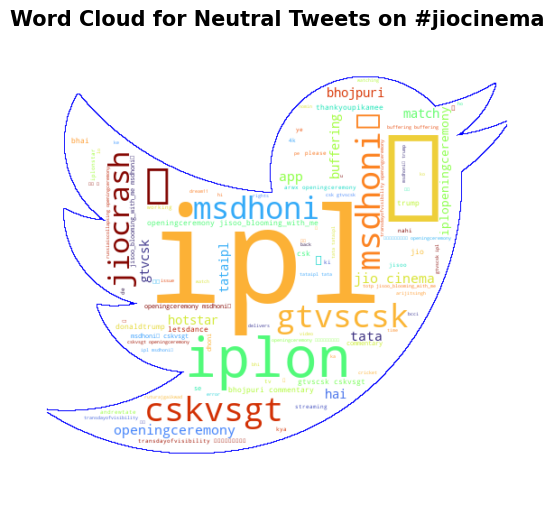

In [60]:
words = " ".join([word for word in neu_tweets['tweet']])
plt.figure(figsize=(6,6), facecolor = "None")

wordcloud = WordCloud(max_words = 100, colormap='turbo', mask=mask,
                      background_color = "white", 
                      contour_width = 1, contour_color = "blue").generate(words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Neutral Tweets on #jiocinema", fontsize = 15, fontdict={"fontweight": 'bold'})
plt.show()